 # <div align="center"> Naives Bayer & ID3 Animal Classifier</div>

### Author & Notes
Skylar Trendley

Data Mining

Homework 4

### Concept Description: </br>
Using Naive Bayers and ID3, create a model that can classify unknown animals into the 7 possible classifications. 

### Data Collection: </br>
The data has been provided by Perry B. Koob. It consists of 19 attributes: a descriptor attribute(name), 15 boolean attributes, a classification attribute (type), and two numerical attributes.

### Example Description: </br>
Attribute Information:
1. animal name: Nominal attribute that indicates the animal. Unique for each instance.  
2. hair: Nominal boolean attribute that describes if the animal has hair.
3. feathers: Nominal boolean attribute that describes if the animal has feathers. 
4. eggs: Nominal boolean attribute that describes if the animal lays eggs.   
5. milk: Nominal boolean attribute that describes if the animal produces milk.   
6. airborne: Nominal boolean attribute that describes if the animal has the capability of flight.   
7. aquatic: Nominal boolean attribute that describes if the animal has the capability to breathe under water.   
8. predator: Nominal boolean attribute that describes if the animal is a predator.   
9. toothed: Nominal boolean attribute that describes if the animal has teeth.  
10. backbone: Nominal boolean attribute that describes if the animal has a backbone.  
11. breathes: Nominal boolean attribute that describes if the animal breathes air.  
12. venomous: Nominal boolean attribute that describes if the animal produces venom.  
13. fins: Nominal boolean attribute that describes if the animal has fins.  
14. legs: Numeric classification that describes the number of legs an animal has (set of values: {0,2,4,5,6,8})  
15. tail: Nominal boolean attribute that describes if the animal has a tail.  
16. domestic: Nominal boolean attribute that describes if the animal has been domesticated.  
17. catsize: Nominal boolean attribute that describes if the animal is catsized.  
18. gestation: Numeric classification that describes if the animal has live birth (in days)
19. type: Nominal classification attribute that describes the species of the animal.

### Data Import and Wrangling:

In [53]:
train <-read.csv(file ='../src-data/animal-taxonomy-train.csv',stringsAsFactors=TRUE)
test <-read.csv(file ='../src-data/animal-taxonomy-test.csv',stringsAsFactors=TRUE)

colnames(test)

#Unused attributes
train$legs <- NULL
train$gestation <- NULL

[1] "animal.name" "hair"        "feathers"    "eggs"        "milk"       
 [6] "airborne"    "aquatic"     "predator"    "toothed"     "backbone"   
[11] "breathes"    "venomous"    "fins"        "legs"        "tail"       
[16] "domestic"    "catsize"     "gestation"   "type"

### Exploratory Data Analysis: </br>

The Naive Bayes and ID3 classifers use nominal attributes, so each attribute was examined and determined to be nominal or discretized to be nominal.

### Mining or Analytics: </br>

In [54]:
#Naive Bayers Classification
library(klaR) #library necessary for naives bayer classification
nb_mod <- NaiveBayes(type~., data=train)
pred<-predict(nb_mod, test)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”


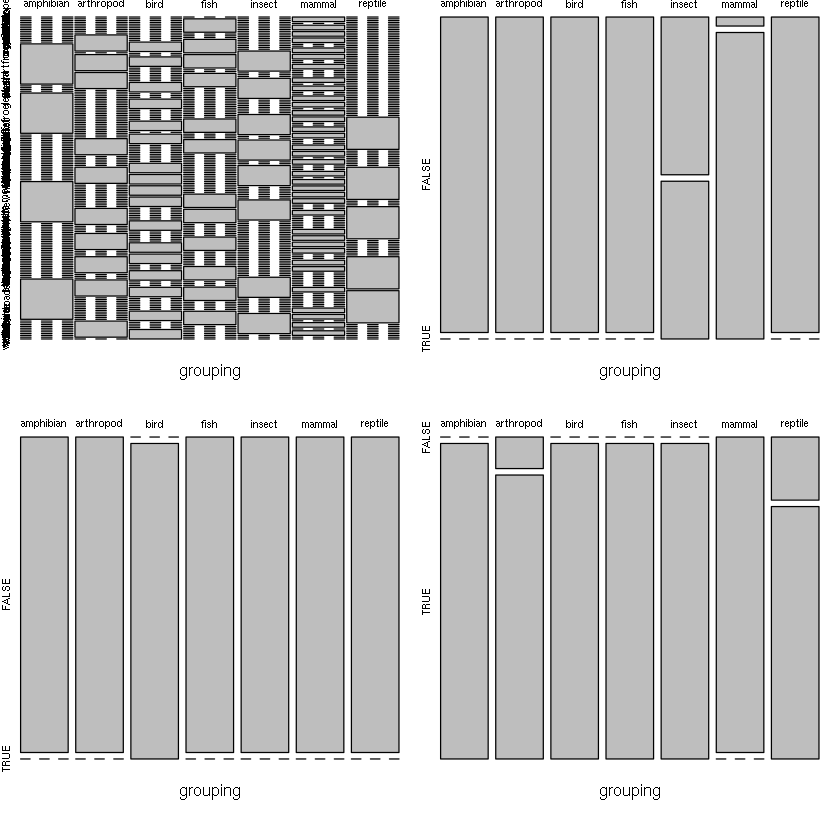

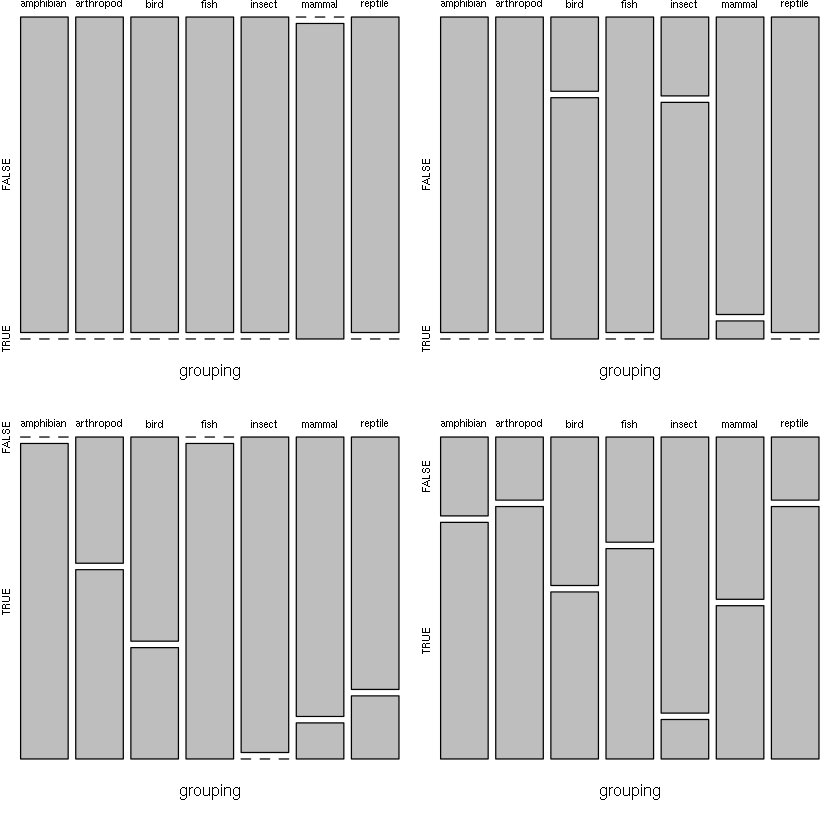

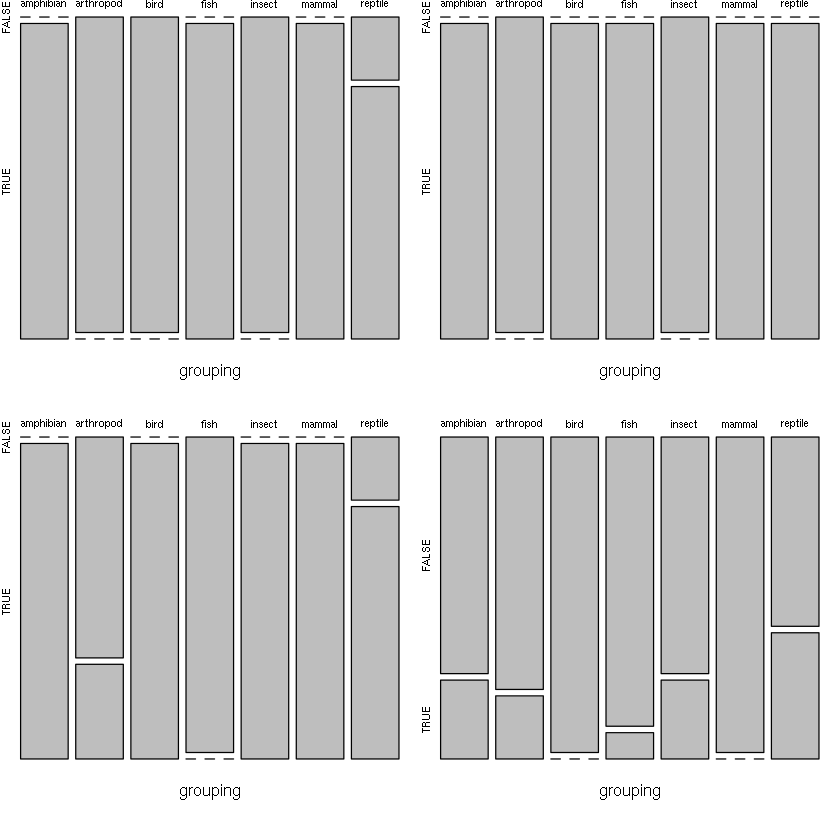

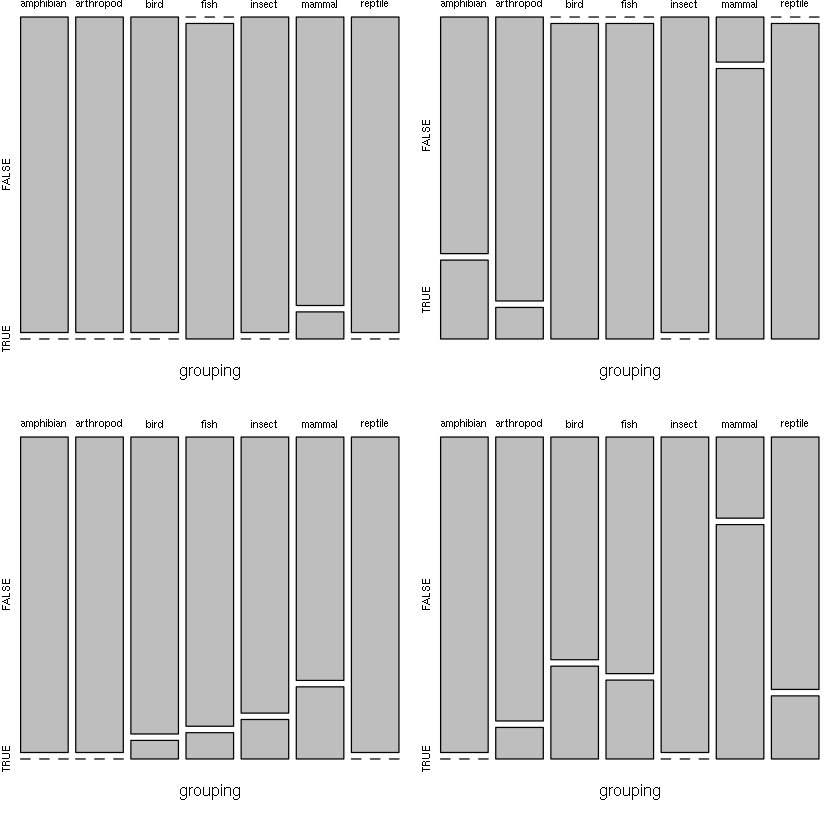

In [55]:
# Plot density of each feature using nb_mod
opar = par(mfrow=c(2, 2), mar=c(4,0,0,0))
plot(nb_mod, main="")  
par(opar)

In [62]:
#ID3 Classification
library(rpart)
library(rpart.plot)
library(party)
library(caret)

tree = ctree(train$type ~ ., data=train)
predict = predict(tree)

predict
test$type

[1] mammal    fish      mammal    mammal    mammal    mammal    fish     
 [8] fish      mammal    mammal    fish      arthropod arthropod arthropod
[15] bird      mammal    bird      mammal    arthropod reptile   reptile  
[22] mammal    mammal    mammal    arthropod mammal    mammal    bird     
[29] fish      mammal    mammal    bird      fish      arthropod arthropod
[36] bird      arthropod bird      mammal    arthropod mammal    mammal   
[43] mammal    mammal    arthropod reptile   arthropod mammal    bird     
[50] bird      bird      bird      fish      fish      reptile   mammal   
[57] mammal    mammal    mammal    mammal    mammal    bird      arthropod
[64] fish      mammal    mammal    reptile   arthropod bird      bird     
[71] reptile   arthropod fish      bird      mammal    arthropod fish     
[78] bird      arthropod reptile   reptile   reptile   fish      mammal   
[85] mammal    bird      mammal    arthropod mammal    arthropod bird     
Levels: amphibian arthropod bird fish insect mammal reptile

[1] mammal bird   mammal mammal bird   bird   mammal mammal mammal fish  
Levels: bird fish mammal

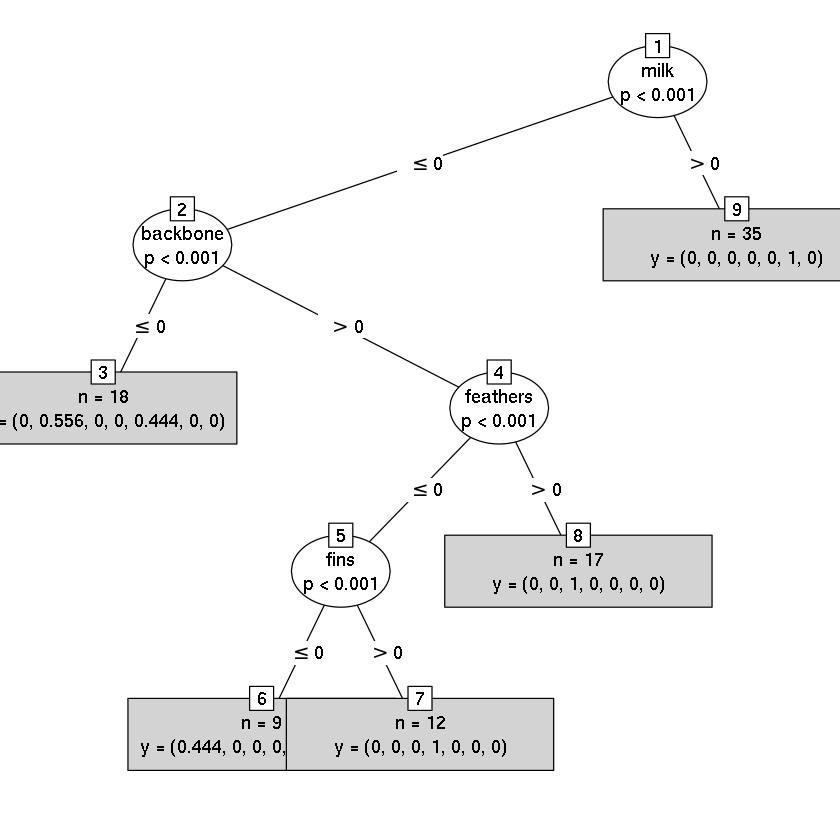

In [57]:
plot(tree, type="simple")

### Evaluation

By using the trained data set and a confusion matrix, we can obtain the accuracy and error rate of both models to determine the strength of our model.  

In [58]:
#Naives Bayers Confusion Matrix
confusionMatrix(test$type, pred$class)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(test$type, pred$class):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

           Reference
Prediction  amphibian arthropod bird fish insect mammal reptile
  amphibian         0         0    0    0      0      0       0
  arthropod         0         0    0    0      0      0       0
  bird              0         0    3    0      0      0       0
  fish              0         0    0    1      0      0       0
  insect            0         0    0    0      0      0       0
  mammal            0         0    0    0      0      6       0
  reptile           0         0    0    0      0      0       0

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6915, 1)
    No Information Rate : 0.6        
    P-Value [Acc > NIR] : 0.006047   
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: amphibian Class: arth

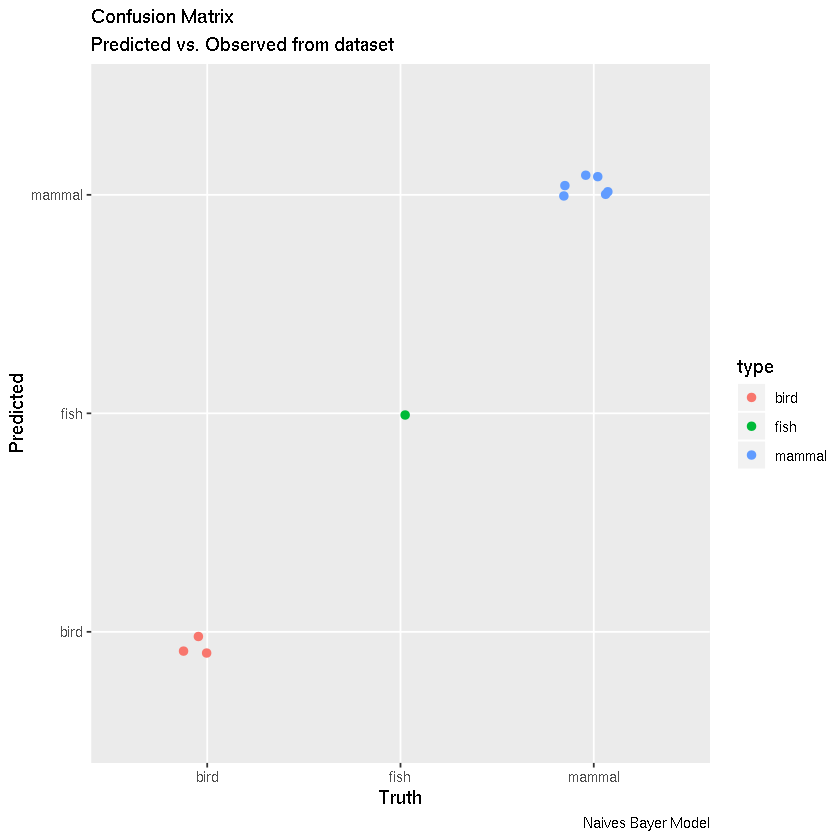

In [59]:
library(ggplot2)
test$pred <- pred$class
ggplot(test, aes(type, pred, color = type)) +
  geom_jitter(width = 0.2, height = 0.1, size=2) +
  labs(title="Confusion Matrix", 
       subtitle="Predicted vs. Observed from dataset", 
       y="Predicted", 
       x="Truth",
       caption="Naives Bayer Model")

In [61]:
# ID3 Confusion Matrix

confusionMatrix(test$type, predict)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(test$type, predict):
“Levels are not in the same order for reference and data. Refactoring data to match.”


ERROR: Error in table(data, reference, dnn = dnn, ...): all arguments must have the same length


### Results
Through testing each classification method via confusion maticies and testing error rate and accuracy, the advantages and disadvantages of both methods were demonstrated. It seems that Naives Bayer performed better for this particular dataset. The decision tree method typically is better for larger datasets, as it seemed to overfit the data for this particular example. I would therefore recommend the Naives Bayer method to the client.

### References
https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/#8buildinganaivebayesclassifierinr</br>

http://ml-tutorials.kyrcha.info/dt.html</br>